In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import glob
import cv2

from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
#from tensorflow.keras.layers.normalization import BatchNormalization
import os
import seaborn as sns
from tensorflow.keras.applications.vgg16 import VGG16

In [4]:
import tensorflow as tf

physical_devices = tf.config.list_physical_devices("GPU")
tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [5]:
SIZE = 75  #Resize images

#Capture training data and labels into respective lists
train_images = []
train_labels = [] 

for directory_path in glob.glob("E:\\MNIST\\Train\\*"):
    label = directory_path.split("\\")[-1]
    print(label)
    for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
        print(img_path)
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)       
        img = cv2.resize(img, (SIZE, SIZE))
        train_images.append(img)
        train_labels.append(label)

0
E:\MNIST\Train\0\1.jpg
E:\MNIST\Train\0\1000.jpg
E:\MNIST\Train\0\1015.jpg
E:\MNIST\Train\0\1018.jpg
E:\MNIST\Train\0\1028.jpg
E:\MNIST\Train\0\1029.jpg
E:\MNIST\Train\0\1040.jpg
E:\MNIST\Train\0\1046.jpg
E:\MNIST\Train\0\1049.jpg
E:\MNIST\Train\0\1076.jpg
E:\MNIST\Train\0\1078.jpg
E:\MNIST\Train\0\108.jpg
E:\MNIST\Train\0\1090.jpg
E:\MNIST\Train\0\1093.jpg
E:\MNIST\Train\0\1102.jpg
E:\MNIST\Train\0\1107.jpg
E:\MNIST\Train\0\1128.jpg
E:\MNIST\Train\0\1137.jpg
E:\MNIST\Train\0\114.jpg
E:\MNIST\Train\0\1152.jpg
E:\MNIST\Train\0\1168.jpg
E:\MNIST\Train\0\1179.jpg
E:\MNIST\Train\0\118.jpg
E:\MNIST\Train\0\119.jpg
E:\MNIST\Train\0\1195.jpg
E:\MNIST\Train\0\1209.jpg
E:\MNIST\Train\0\121.jpg
E:\MNIST\Train\0\1268.jpg
E:\MNIST\Train\0\1304.jpg
E:\MNIST\Train\0\1310.jpg
E:\MNIST\Train\0\1346.jpg
E:\MNIST\Train\0\1349.jpg
E:\MNIST\Train\0\1359.jpg
E:\MNIST\Train\0\1363.jpg
E:\MNIST\Train\0\1367.jpg
E:\MNIST\Train\0\1368.jpg
E:\MNIST\Train\0\1371.jpg
E:\MNIST\Train\0\1372.jpg
E:\MNIST\Train\0\1

E:\MNIST\Train\0\5154.jpg
E:\MNIST\Train\0\5167.jpg
E:\MNIST\Train\0\519.jpg
E:\MNIST\Train\0\524.jpg
E:\MNIST\Train\0\526.jpg
E:\MNIST\Train\0\527.jpg
E:\MNIST\Train\0\542.jpg
E:\MNIST\Train\0\56.jpg
E:\MNIST\Train\0\577.jpg
E:\MNIST\Train\0\582.jpg
E:\MNIST\Train\0\596.jpg
E:\MNIST\Train\0\603.jpg
E:\MNIST\Train\0\612.jpg
E:\MNIST\Train\0\63.jpg
E:\MNIST\Train\0\633.jpg
E:\MNIST\Train\0\639.jpg
E:\MNIST\Train\0\656.jpg
E:\MNIST\Train\0\662.jpg
E:\MNIST\Train\0\666.jpg
E:\MNIST\Train\0\667.jpg
E:\MNIST\Train\0\668.jpg
E:\MNIST\Train\0\669.jpg
E:\MNIST\Train\0\68.jpg
E:\MNIST\Train\0\689.jpg
E:\MNIST\Train\0\69.jpg
E:\MNIST\Train\0\702.jpg
E:\MNIST\Train\0\709.jpg
E:\MNIST\Train\0\712.jpg
E:\MNIST\Train\0\733.jpg
E:\MNIST\Train\0\743.jpg
E:\MNIST\Train\0\745.jpg
E:\MNIST\Train\0\75.jpg
E:\MNIST\Train\0\776.jpg
E:\MNIST\Train\0\781.jpg
E:\MNIST\Train\0\787.jpg
E:\MNIST\Train\0\790.jpg
E:\MNIST\Train\0\81.jpg
E:\MNIST\Train\0\818.jpg
E:\MNIST\Train\0\825.jpg
E:\MNIST\Train\0\849.jpg
E:\M

E:\MNIST\Train\1\747.jpg
E:\MNIST\Train\1\765.jpg
E:\MNIST\Train\1\77.jpg
E:\MNIST\Train\1\779.jpg
E:\MNIST\Train\1\78.jpg
E:\MNIST\Train\1\780.jpg
E:\MNIST\Train\1\783.jpg
E:\MNIST\Train\1\8.jpg
E:\MNIST\Train\1\809.jpg
E:\MNIST\Train\1\821.jpg
E:\MNIST\Train\1\833.jpg
E:\MNIST\Train\1\835.jpg
E:\MNIST\Train\1\838.jpg
E:\MNIST\Train\1\870.jpg
E:\MNIST\Train\1\871.jpg
E:\MNIST\Train\1\891.jpg
E:\MNIST\Train\1\905.jpg
E:\MNIST\Train\1\919.jpg
E:\MNIST\Train\1\920.jpg
E:\MNIST\Train\1\941.jpg
E:\MNIST\Train\1\951.jpg
E:\MNIST\Train\1\959.jpg
E:\MNIST\Train\1\961.jpg
E:\MNIST\Train\1\978.jpg
E:\MNIST\Train\1\982.jpg
E:\MNIST\Train\1\99.jpg
E:\MNIST\Train\1\993.jpg
2
E:\MNIST\Train\2\1010.jpg
E:\MNIST\Train\2\1011.jpg
E:\MNIST\Train\2\1033.jpg
E:\MNIST\Train\2\1034.jpg
E:\MNIST\Train\2\1047.jpg
E:\MNIST\Train\2\1048.jpg
E:\MNIST\Train\2\1053.jpg
E:\MNIST\Train\2\1058.jpg
E:\MNIST\Train\2\1074.jpg
E:\MNIST\Train\2\109.jpg
E:\MNIST\Train\2\1096.jpg
E:\MNIST\Train\2\1124.jpg
E:\MNIST\Train\2\

E:\MNIST\Train\3\10.jpg
E:\MNIST\Train\3\1007.jpg
E:\MNIST\Train\3\1021.jpg
E:\MNIST\Train\3\1035.jpg
E:\MNIST\Train\3\1055.jpg
E:\MNIST\Train\3\1068.jpg
E:\MNIST\Train\3\107.jpg
E:\MNIST\Train\3\1077.jpg
E:\MNIST\Train\3\1097.jpg
E:\MNIST\Train\3\1108.jpg
E:\MNIST\Train\3\111.jpg
E:\MNIST\Train\3\1119.jpg
E:\MNIST\Train\3\1121.jpg
E:\MNIST\Train\3\1130.jpg
E:\MNIST\Train\3\1144.jpg
E:\MNIST\Train\3\1145.jpg
E:\MNIST\Train\3\1150.jpg
E:\MNIST\Train\3\1151.jpg
E:\MNIST\Train\3\1158.jpg
E:\MNIST\Train\3\1178.jpg
E:\MNIST\Train\3\1185.jpg
E:\MNIST\Train\3\12.jpg
E:\MNIST\Train\3\1201.jpg
E:\MNIST\Train\3\1218.jpg
E:\MNIST\Train\3\1226.jpg
E:\MNIST\Train\3\1233.jpg
E:\MNIST\Train\3\1234.jpg
E:\MNIST\Train\3\1241.jpg
E:\MNIST\Train\3\1244.jpg
E:\MNIST\Train\3\1260.jpg
E:\MNIST\Train\3\1290.jpg
E:\MNIST\Train\3\1295.jpg
E:\MNIST\Train\3\130.jpg
E:\MNIST\Train\3\1312.jpg
E:\MNIST\Train\3\1315.jpg
E:\MNIST\Train\3\1317.jpg
E:\MNIST\Train\3\1320.jpg
E:\MNIST\Train\3\1336.jpg
E:\MNIST\Train\3\13

E:\MNIST\Train\4\1004.jpg
E:\MNIST\Train\4\1006.jpg
E:\MNIST\Train\4\1008.jpg
E:\MNIST\Train\4\1030.jpg
E:\MNIST\Train\4\1037.jpg
E:\MNIST\Train\4\1050.jpg
E:\MNIST\Train\4\1073.jpg
E:\MNIST\Train\4\1079.jpg
E:\MNIST\Train\4\1094.jpg
E:\MNIST\Train\4\1098.jpg
E:\MNIST\Train\4\1099.jpg
E:\MNIST\Train\4\1110.jpg
E:\MNIST\Train\4\1133.jpg
E:\MNIST\Train\4\1149.jpg
E:\MNIST\Train\4\115.jpg
E:\MNIST\Train\4\1160.jpg
E:\MNIST\Train\4\1163.jpg
E:\MNIST\Train\4\1164.jpg
E:\MNIST\Train\4\1171.jpg
E:\MNIST\Train\4\1172.jpg
E:\MNIST\Train\4\1176.jpg
E:\MNIST\Train\4\1180.jpg
E:\MNIST\Train\4\1187.jpg
E:\MNIST\Train\4\1196.jpg
E:\MNIST\Train\4\1198.jpg
E:\MNIST\Train\4\1203.jpg
E:\MNIST\Train\4\1212.jpg
E:\MNIST\Train\4\1215.jpg
E:\MNIST\Train\4\1220.jpg
E:\MNIST\Train\4\1227.jpg
E:\MNIST\Train\4\1232.jpg
E:\MNIST\Train\4\1248.jpg
E:\MNIST\Train\4\1253.jpg
E:\MNIST\Train\4\1258.jpg
E:\MNIST\Train\4\1261.jpg
E:\MNIST\Train\4\127.jpg
E:\MNIST\Train\4\1271.jpg
E:\MNIST\Train\4\1273.jpg
E:\MNIST\Train

E:\MNIST\Train\5\0.jpg
E:\MNIST\Train\5\100.jpg
E:\MNIST\Train\5\1024.jpg
E:\MNIST\Train\5\1032.jpg
E:\MNIST\Train\5\1039.jpg
E:\MNIST\Train\5\1062.jpg
E:\MNIST\Train\5\1071.jpg
E:\MNIST\Train\5\1087.jpg
E:\MNIST\Train\5\1089.jpg
E:\MNIST\Train\5\11.jpg
E:\MNIST\Train\5\1104.jpg
E:\MNIST\Train\5\1109.jpg
E:\MNIST\Train\5\1111.jpg
E:\MNIST\Train\5\1135.jpg
E:\MNIST\Train\5\1162.jpg
E:\MNIST\Train\5\1206.jpg
E:\MNIST\Train\5\1210.jpg
E:\MNIST\Train\5\1222.jpg
E:\MNIST\Train\5\1245.jpg
E:\MNIST\Train\5\1263.jpg
E:\MNIST\Train\5\1265.jpg
E:\MNIST\Train\5\1276.jpg
E:\MNIST\Train\5\1278.jpg
E:\MNIST\Train\5\1283.jpg
E:\MNIST\Train\5\1285.jpg
E:\MNIST\Train\5\1288.jpg
E:\MNIST\Train\5\1298.jpg
E:\MNIST\Train\5\1311.jpg
E:\MNIST\Train\5\1313.jpg
E:\MNIST\Train\5\132.jpg
E:\MNIST\Train\5\1324.jpg
E:\MNIST\Train\5\1325.jpg
E:\MNIST\Train\5\1328.jpg
E:\MNIST\Train\5\1340.jpg
E:\MNIST\Train\5\1356.jpg
E:\MNIST\Train\5\138.jpg
E:\MNIST\Train\5\1382.jpg
E:\MNIST\Train\5\1402.jpg
E:\MNIST\Train\5\140

E:\MNIST\Train\6\1020.jpg
E:\MNIST\Train\6\1041.jpg
E:\MNIST\Train\6\106.jpg
E:\MNIST\Train\6\1070.jpg
E:\MNIST\Train\6\1091.jpg
E:\MNIST\Train\6\1092.jpg
E:\MNIST\Train\6\1100.jpg
E:\MNIST\Train\6\1113.jpg
E:\MNIST\Train\6\1117.jpg
E:\MNIST\Train\6\1136.jpg
E:\MNIST\Train\6\1139.jpg
E:\MNIST\Train\6\1146.jpg
E:\MNIST\Train\6\1159.jpg
E:\MNIST\Train\6\1182.jpg
E:\MNIST\Train\6\1184.jpg
E:\MNIST\Train\6\1189.jpg
E:\MNIST\Train\6\1190.jpg
E:\MNIST\Train\6\1202.jpg
E:\MNIST\Train\6\1204.jpg
E:\MNIST\Train\6\1224.jpg
E:\MNIST\Train\6\1228.jpg
E:\MNIST\Train\6\1240.jpg
E:\MNIST\Train\6\1257.jpg
E:\MNIST\Train\6\126.jpg
E:\MNIST\Train\6\1266.jpg
E:\MNIST\Train\6\1269.jpg
E:\MNIST\Train\6\129.jpg
E:\MNIST\Train\6\1297.jpg
E:\MNIST\Train\6\13.jpg
E:\MNIST\Train\6\1303.jpg
E:\MNIST\Train\6\1309.jpg
E:\MNIST\Train\6\1318.jpg
E:\MNIST\Train\6\1323.jpg
E:\MNIST\Train\6\1327.jpg
E:\MNIST\Train\6\1337.jpg
E:\MNIST\Train\6\1350.jpg
E:\MNIST\Train\6\1358.jpg
E:\MNIST\Train\6\1366.jpg
E:\MNIST\Train\6\

E:\MNIST\Train\6\762.jpg
E:\MNIST\Train\6\770.jpg
E:\MNIST\Train\6\785.jpg
E:\MNIST\Train\6\794.jpg
E:\MNIST\Train\6\802.jpg
E:\MNIST\Train\6\810.jpg
E:\MNIST\Train\6\816.jpg
E:\MNIST\Train\6\829.jpg
E:\MNIST\Train\6\83.jpg
E:\MNIST\Train\6\841.jpg
E:\MNIST\Train\6\846.jpg
E:\MNIST\Train\6\852.jpg
E:\MNIST\Train\6\881.jpg
E:\MNIST\Train\6\892.jpg
E:\MNIST\Train\6\90.jpg
E:\MNIST\Train\6\901.jpg
E:\MNIST\Train\6\910.jpg
E:\MNIST\Train\6\922.jpg
E:\MNIST\Train\6\93.jpg
E:\MNIST\Train\6\939.jpg
E:\MNIST\Train\6\944.jpg
E:\MNIST\Train\6\955.jpg
E:\MNIST\Train\6\958.jpg
E:\MNIST\Train\6\973.jpg
E:\MNIST\Train\6\977.jpg
E:\MNIST\Train\6\986.jpg
E:\MNIST\Train\6\996.jpg
E:\MNIST\Train\6\999.jpg
7
E:\MNIST\Train\7\1001.jpg
E:\MNIST\Train\7\101.jpg
E:\MNIST\Train\7\1014.jpg
E:\MNIST\Train\7\1019.jpg
E:\MNIST\Train\7\1022.jpg
E:\MNIST\Train\7\1023.jpg
E:\MNIST\Train\7\103.jpg
E:\MNIST\Train\7\1042.jpg
E:\MNIST\Train\7\1043.jpg
E:\MNIST\Train\7\1054.jpg
E:\MNIST\Train\7\1057.jpg
E:\MNIST\Train\7\

E:\MNIST\Train\8\1009.jpg
E:\MNIST\Train\8\1013.jpg
E:\MNIST\Train\8\1016.jpg
E:\MNIST\Train\8\1025.jpg
E:\MNIST\Train\8\1026.jpg
E:\MNIST\Train\8\1045.jpg
E:\MNIST\Train\8\1059.jpg
E:\MNIST\Train\8\1063.jpg
E:\MNIST\Train\8\1064.jpg
E:\MNIST\Train\8\1067.jpg
E:\MNIST\Train\8\1086.jpg
E:\MNIST\Train\8\1101.jpg
E:\MNIST\Train\8\1105.jpg
E:\MNIST\Train\8\1120.jpg
E:\MNIST\Train\8\1141.jpg
E:\MNIST\Train\8\1170.jpg
E:\MNIST\Train\8\1193.jpg
E:\MNIST\Train\8\1207.jpg
E:\MNIST\Train\8\1214.jpg
E:\MNIST\Train\8\1219.jpg
E:\MNIST\Train\8\1223.jpg
E:\MNIST\Train\8\1236.jpg
E:\MNIST\Train\8\1237.jpg
E:\MNIST\Train\8\1239.jpg
E:\MNIST\Train\8\1247.jpg
E:\MNIST\Train\8\125.jpg
E:\MNIST\Train\8\1254.jpg
E:\MNIST\Train\8\1267.jpg
E:\MNIST\Train\8\1279.jpg
E:\MNIST\Train\8\1289.jpg
E:\MNIST\Train\8\1294.jpg
E:\MNIST\Train\8\1296.jpg
E:\MNIST\Train\8\1319.jpg
E:\MNIST\Train\8\1329.jpg
E:\MNIST\Train\8\1339.jpg
E:\MNIST\Train\8\1344.jpg
E:\MNIST\Train\8\1362.jpg
E:\MNIST\Train\8\137.jpg
E:\MNIST\Train

E:\MNIST\Train\9\1005.jpg
E:\MNIST\Train\9\1027.jpg
E:\MNIST\Train\9\1036.jpg
E:\MNIST\Train\9\1038.jpg
E:\MNIST\Train\9\1056.jpg
E:\MNIST\Train\9\1061.jpg
E:\MNIST\Train\9\1066.jpg
E:\MNIST\Train\9\1083.jpg
E:\MNIST\Train\9\110.jpg
E:\MNIST\Train\9\1103.jpg
E:\MNIST\Train\9\1112.jpg
E:\MNIST\Train\9\1116.jpg
E:\MNIST\Train\9\1122.jpg
E:\MNIST\Train\9\1138.jpg
E:\MNIST\Train\9\1142.jpg
E:\MNIST\Train\9\1147.jpg
E:\MNIST\Train\9\116.jpg
E:\MNIST\Train\9\1161.jpg
E:\MNIST\Train\9\1167.jpg
E:\MNIST\Train\9\1169.jpg
E:\MNIST\Train\9\1173.jpg
E:\MNIST\Train\9\1177.jpg
E:\MNIST\Train\9\1194.jpg
E:\MNIST\Train\9\1221.jpg
E:\MNIST\Train\9\1235.jpg
E:\MNIST\Train\9\1250.jpg
E:\MNIST\Train\9\1256.jpg
E:\MNIST\Train\9\1272.jpg
E:\MNIST\Train\9\1274.jpg
E:\MNIST\Train\9\1282.jpg
E:\MNIST\Train\9\1284.jpg
E:\MNIST\Train\9\1286.jpg
E:\MNIST\Train\9\1291.jpg
E:\MNIST\Train\9\1292.jpg
E:\MNIST\Train\9\1305.jpg
E:\MNIST\Train\9\1307.jpg
E:\MNIST\Train\9\1316.jpg
E:\MNIST\Train\9\133.jpg
E:\MNIST\Train\

In [6]:
#Convert lists to arrays        
train_images = np.array(train_images)
train_labels = np.array(train_labels)


In [7]:
# Capture test/validation data and labels into respective lists

test_images = []
test_labels = [] 
for directory_path in glob.glob("E:\\MNIST\\Test\\*"):
    fruit_label = directory_path.split("\\")[-1]
    for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)
        img = cv2.resize(img, (SIZE, SIZE))
        test_images.append(img)
        test_labels.append(fruit_label)

In [8]:
#Convert lists to arrays                
test_images = np.array(test_images)
test_labels = np.array(test_labels)

In [9]:
#Encode labels from text to integers.
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(test_labels)
test_labels_encoded = le.transform(test_labels)
le.fit(train_labels)
train_labels_encoded = le.transform(train_labels)

#Split data into test and train datasets (already split but assigning to meaningful convention)
x_train, y_train, x_test, y_test = train_images, train_labels_encoded, test_images, test_labels_encoded

In [10]:
# Normalize pixel values to between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

In [11]:
#One hot encode y values for neural network. 
from tensorflow.keras.utils import to_categorical
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [12]:
#Load model wothout classifier/fully connected layers
VGG_model = VGG16(weights='imagenet', include_top=False, input_shape=(SIZE, SIZE, 3))

#Make loaded layers as non-trainable. This is important as we want to work with pre-trained weights
for layer in VGG_model.layers:
	layer.trainable = False
    


In [13]:
x = Flatten()(VGG_model.output)
prediction_layer = Dense(10, activation = 'softmax')(x)

# Make a new model combining both feature extractor and x
model = Model(inputs=VGG_model.input, outputs=prediction_layer)


In [14]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [15]:
model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 75, 75, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 75, 75, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 75, 75, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 37, 37, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 37, 37, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 37, 37, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 18, 18, 128)       0     

In [16]:
from tensorflow import keras
import time


class TimeHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.times = []

    def on_epoch_begin(self, batch, logs={}):
        self.epoch_time_start = time.time()

    def on_epoch_end(self, batch, logs={}):
        self.times.append(time.time() - self.epoch_time_start)

In [17]:
time_callback = TimeHistory()
history = model.fit(x_train, y_train_one_hot, epochs=5, validation_data = (x_test, y_test_one_hot),callbacks=[time_callback])
times = time_callback.times


Epoch 1/5
157/157 [==============================] - 105s 448ms/step - loss: 1.0194 - accuracy: 0.7870 - val_loss: 0.4944 - val_accuracy: 0.9100
Epoch 2/5
157/157 [==============================] - 69s 437ms/step - loss: 0.3598 - accuracy: 0.9324 - val_loss: 0.3241 - val_accuracy: 0.9290
Epoch 3/5
157/157 [==============================] - 72s 456ms/step - loss: 0.2485 - accuracy: 0.9488 - val_loss: 0.2516 - val_accuracy: 0.9470
Epoch 4/5
157/157 [==============================] - 71s 456ms/step - loss: 0.1957 - accuracy: 0.9602 - val_loss: 0.2249 - val_accuracy: 0.9480
Epoch 5/5
157/157 [==============================] - 73s 463ms/step - loss: 0.1625 - accuracy: 0.9648 - val_loss: 0.1981 - val_accuracy: 0.9550


In [19]:
print(times)

[105.32426691055298, 68.58766913414001, 71.61594223976135, 71.39230418205261, 72.73047947883606]


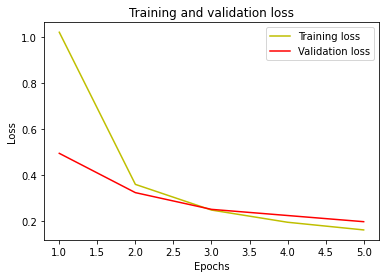

In [20]:
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

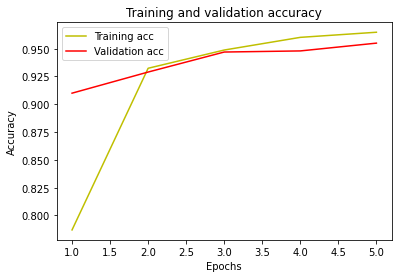

In [21]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [22]:
prediction_NN = model.predict(x_test)
prediction_NN = np.argmax(prediction_NN, axis=-1)
prediction_NN = le.inverse_transform(prediction_NN)

[[100   0   0   0   0   0   0   0   0   0]
 [  0 100   0   0   0   0   0   0   0   0]
 [  0   1  97   0   0   0   0   2   0   0]
 [  0   0   1  99   0   0   0   0   0   0]
 [  0   1   0   0  93   0   1   2   1   2]
 [  0   0   0   4   0  92   0   4   0   0]
 [  2   0   0   0   0   1  97   0   0   0]
 [  2   1   3   2   0   0   0  88   0   4]
 [  1   1   1   0   0   0   1   0  94   2]
 [  0   1   0   0   2   0   0   1   1  95]]


<AxesSubplot:>

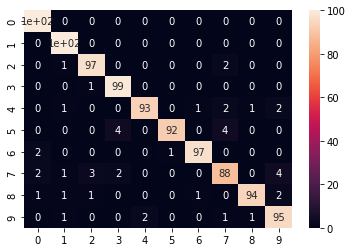

In [23]:
#Confusion Matrix - verify accuracy of each class
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_labels, prediction_NN)
print(cm)
sns.heatmap(cm, annot=True)

In [24]:
#Print overall accuracy
from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(test_labels, prediction_NN))

Accuracy =  0.955


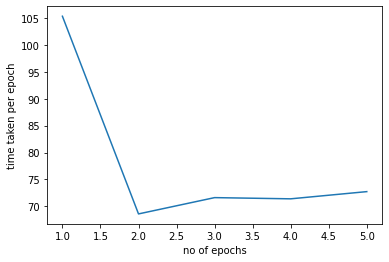

In [25]:
# importing package
import matplotlib.pyplot as plt

# create data
x = [1,2,3,4,5]
y = times


# plot line
plt.plot(x,y)
plt.xlabel("no of epochs")
plt.ylabel("time taken per epoch")
plt.show()


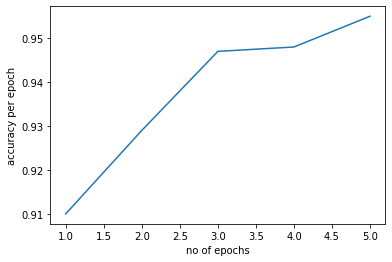

In [26]:
# importing package
import matplotlib.pyplot as plt

# create data
x = [1,2,3,4,5]
y = val_acc

# plot line
plt.plot(x,y)
plt.xlabel("no of epochs")
plt.ylabel("accuracy per epoch")
plt.show()



In [27]:
print(val_acc)

[0.9100000262260437, 0.9290000200271606, 0.9470000267028809, 0.9480000138282776, 0.9549999833106995]
